In [74]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits, load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [76]:
X = np.arange(10).reshape(-1,1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

print(X, "shape:", X.shape)
print(y, "shape:", y.shape)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] shape: (10, 1)
[0 0 0 0 1 1 1 1 1 1] shape: (10,)


In [77]:
model = LogisticRegression(solver="liblinear", random_state=1)

model.fit(X, y)

prediction = model.predict(X)

In [6]:
print("List of classes:", model.classes_)

List of classes: [0 1]


In [78]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [-1.04608067]
Coefficients: [[0.51491375]]


In [79]:
print("label:", y, sep="\n")
print("prediction:", prediction, sep="\n")

label:
[0 0 0 0 1 1 1 1 1 1]
prediction:
[0 0 0 1 1 1 1 1 1 1]


In [80]:
model.predict_proba(X) * 100

array([[74.00215698, 25.99784302],
       [62.97552369, 37.02447631],
       [50.40632049, 49.59367951],
       [37.78554919, 62.21445081],
       [26.62809349, 73.37190651],
       [17.82150087, 82.17849913],
       [11.47207921, 88.52792079],
       [ 7.18698219, 92.81301781],
       [ 4.42251267, 95.57748733],
       [ 2.69056947, 97.30943053]])

In [81]:
(1*model.coef_ + model.intercept_)

array([[-0.53116692]])

In [82]:
acc_score = model.score(X, y)
print("accuracy score:", acc_score)

accuracy score: 0.9


In [83]:
confusion_matrix(y, prediction)

array([[3, 1],
       [0, 6]], dtype=int64)

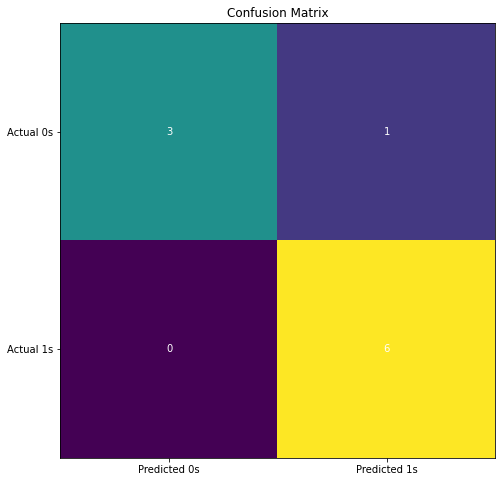

In [84]:
confusion = confusion_matrix(y, prediction)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5, -.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion[i, j], ha="center", va="center", color="white")
plt.title("Confusion Matrix")
plt.show()

In [19]:
print(classification_report(y, prediction))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



Accuracy => (TP + TN) / (TP + TN + FN + FP)

Precision => **dari yg diprediksi positif, berapa banyak yg sebenernya positif**.

> precision = TP / (TP + FP)

Recall => **dari yang sebenernya positif, berapa banyak yg berhasil model prediksi sbg positif**.

> Recall = TP / (TP + FN)

Ket : 0 = negatif
      1 = positif
      T = True
      F = False
      P = Positive
      N = Negative

In [23]:
total_pred_pos = 7
pred_actual_pos = 6
precision = pred_actual_pos / total_pred_pos
print("precision:", precision)

total_actual_pos = 6
actual_pred_pos = 6
recall = actual_pred_pos / total_actual_pos
print("recall:", recall)

precision: 0.8571428571428571
recall: 1.0


2 Case :
1. Deteksi covid
2. Deteksi spam

### Handwriting Recognition

In [85]:
X, y = load_digits(return_X_y = True)

In [86]:
print("Dataset shape:", X.shape)
print("Target shape:", y.shape)

Dataset shape: (1797, 64)
Target shape: (1797,)


In [87]:
print("Sample image:")
print(X[0])

Sample image:
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [88]:
images = X.reshape(-1, 8, 8)
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

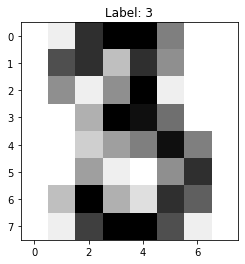

In [90]:
sample = np.random.randint(len(images))
plt.imshow(images[sample], cmap=plt.cm.gray_r)
plt.title(f"Label: {y[sample]}")
plt.show()

In [91]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.2, random_state=111)

print(f"Training with: {len(X_train)}.. Validating with: {len(X_valid)}")

Training with: 1437.. Validating with: 360


In [92]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_valid = scaler.transform(X_valid)

In [93]:
X_train[0], scaled_X_train[0], X_valid[0], scaled_X_valid[0]

(array([ 0.,  0.,  3., 15., 16., 16., 12.,  0.,  0.,  0., 12., 12.,  7.,
        16.,  6.,  0.,  0.,  4., 12.,  0.,  9., 13.,  0.,  0.,  0.,  0.,
         1.,  1., 13.,  7.,  0.,  0.,  0.,  0.,  8., 13., 16., 16.,  6.,
         0.,  0.,  0., 12., 15., 12.,  6.,  1.,  0.,  0.,  0.,  0., 15.,
         5.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.]),
 array([ 0.00000000e+00, -3.35150624e-01, -4.73128609e-01,  7.43064836e-01,
         9.70988363e-01,  1.81050738e+00,  3.22283070e+00, -1.29737637e-01,
        -5.01149787e-02, -6.34247931e-01,  2.72410162e-01,  3.47599586e-04,
        -6.94511047e-01,  1.28981872e+00,  1.13866717e+00, -1.32944585e-01,
        -2.63889907e-02,  3.92196637e-01,  3.44973933e-01, -1.20956234e+00,
         3.04876340e-01,  8.34717807e-01, -5.46683761e-01, -1.13506694e-01,
        -2.63889907e-02, -7.85595556e-01, -1.30870879e+00, -1.33156188e+00,
         5.00996086e-01, -9.05352464e-02, -6.26915500e-01, -5.28331981e-02,
         0.00000000e+00, -6.63

In [94]:
# define model
model = LogisticRegression(solver="liblinear", C=.05, multi_class="ovr", random_state=1)

# train model
model.fit(scaled_X_train, y_train)

# predict train and valid set
train_pred = model.predict(scaled_X_train)
valid_pred = model.predict(scaled_X_valid)

# classification reports
print("Training report:", classification_report(y_train, train_pred), sep="\n")
print("Validation report:", classification_report(y_valid, valid_pred), sep="\n")

Training report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       142
           1       0.93      0.97      0.95       143
           2       0.97      1.00      0.99       145
           3       0.99      0.97      0.98       148
           4       1.00      0.98      0.99       143
           5       0.97      0.98      0.97       147
           6       0.99      0.99      0.99       143
           7       0.97      0.99      0.98       141
           8       0.95      0.89      0.92       138
           9       0.93      0.93      0.93       147

    accuracy                           0.97      1437
   macro avg       0.97      0.97      0.97      1437
weighted avg       0.97      0.97      0.97      1437

Validation report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       0.97      0.92      0.95        39
           2       0.91      0.97      0.9

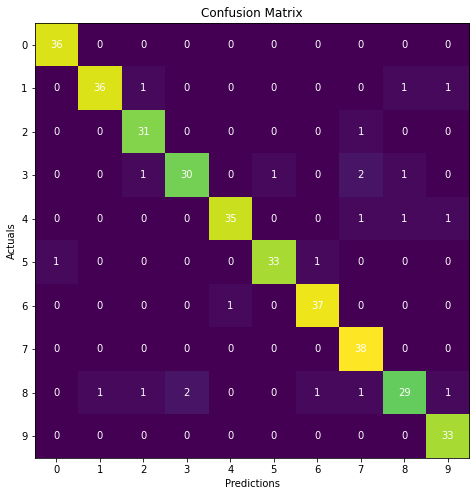

In [95]:
confusion = confusion_matrix(y_valid, valid_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion)
ax.grid(False)
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_xlabel("Predictions")
ax.set_ylabel("Actuals")
ax.set_ylim(9.5, -.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, confusion[i, j], ha="center", va="center", color="white")
plt.title("Confusion Matrix")
plt.show()

In [96]:
misclassified = np.where(y_valid != valid_pred)[0]

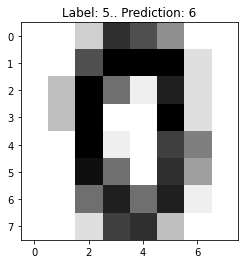

In [98]:
sample = np.random.randint(len(misclassified))
prediction = model.predict(scaler.transform(X_valid[misclassified[sample]].reshape(1, -1)))
plt.imshow(images[sample], cmap=plt.cm.gray_r)
plt.title(f"Label: {y_valid[misclassified[sample]]}.. Prediction: {prediction[0]}")
plt.show()

### K-Nearest Neighbors

In [105]:
wine = load_wine()

In [106]:
feature_names = wine.feature_names
target_names = wine.target_names

print("Feature names:", feature_names)
print("Target names:", target_names)

Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target names: ['class_0' 'class_1' 'class_2']


In [107]:
print("Data shape:", wine.data.shape)
print("Target shape:", wine.target.shape)

Data shape: (178, 13)
Target shape: (178,)


In [108]:
X_train, X_valid, y_train, y_valid = train_test_split(wine.data, wine.target, test_size=.3, random_state=1)
print(f"Training with: {len(X_train)}.. Validating with: {len(X_valid)}")

Training with: 124.. Validating with: 54


In [109]:
X_train[0], X_valid[0]

(array([ 12.08,   1.83,   2.32,  18.5 ,  81.  ,   1.6 ,   1.5 ,   0.52,
          1.64,   2.4 ,   1.08,   2.27, 480.  ]),
 array([1.369e+01, 3.260e+00, 2.540e+00, 2.000e+01, 1.070e+02, 1.830e+00,
        5.600e-01, 5.000e-01, 8.000e-01, 5.880e+00, 9.600e-01, 1.820e+00,
        6.800e+02]))

In [110]:
# define KNN model
model = KNeighborsClassifier(n_neighbors=7)

# train kNN -> store data and label
model.fit(X_train, y_train)

# predict
train_pred = model.predict(X_train)
valid_pred = model.predict(X_valid)

# classification report
print("Training performance:",
      classification_report(y_train, train_pred, target_names=target_names),
      sep="\n")
print("Validation performance:",
      classification_report(y_valid, valid_pred, target_names=target_names),
      sep="\n")

Training performance:
              precision    recall  f1-score   support

     class_0       0.91      0.86      0.89        36
     class_1       0.74      0.81      0.77        52
     class_2       0.67      0.61      0.64        36

    accuracy                           0.77       124
   macro avg       0.77      0.76      0.76       124
weighted avg       0.77      0.77      0.77       124

Validation performance:
              precision    recall  f1-score   support

     class_0       0.95      0.78      0.86        23
     class_1       0.61      0.58      0.59        19
     class_2       0.35      0.50      0.41        12

    accuracy                           0.65        54
   macro avg       0.64      0.62      0.62        54
weighted avg       0.70      0.65      0.67        54



In [111]:
error = []

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_valid)
    error.append(np.mean(prediction != y_valid))

print(error)

[0.25925925925925924, 0.3333333333333333, 0.25925925925925924, 0.3333333333333333, 0.2962962962962963, 0.4074074074074074, 0.35185185185185186, 0.3333333333333333, 0.3148148148148148, 0.3333333333333333, 0.2962962962962963, 0.3148148148148148, 0.2962962962962963, 0.2962962962962963, 0.2962962962962963, 0.2962962962962963, 0.25925925925925924, 0.2777777777777778, 0.2777777777777778, 0.25925925925925924, 0.3333333333333333, 0.2962962962962963, 0.3148148148148148, 0.2777777777777778, 0.2962962962962963, 0.2777777777777778, 0.2777777777777778, 0.2777777777777778, 0.25925925925925924, 0.2777777777777778, 0.3148148148148148, 0.3148148148148148, 0.3333333333333333, 0.2962962962962963, 0.2777777777777778, 0.2962962962962963, 0.2962962962962963, 0.2962962962962963, 0.2962962962962963]


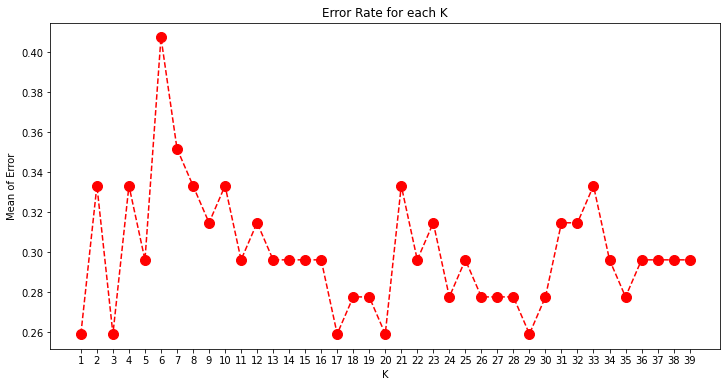

In [112]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color="r", linestyle="dashed", marker="o", markersize=10)
plt.title("Error Rate for each K")
plt.xlabel("K")
plt.xticks(range(1, 40))
plt.ylabel("Mean of Error")
plt.show()

In [113]:
k = 1
# define kNN model
model = KNeighborsClassifier(n_neighbors=k)

# train kNN -> store data and label
model.fit(X_train, y_train)

# predict
train_pred = model.predict(X_train)
valid_pred = model.predict(X_valid)

# classification report
print("Training performance:",
      classification_report(y_train, train_pred, target_names=target_names),
      sep="\n")
print("Validation performance:",
      classification_report(y_valid, valid_pred, target_names=target_names),
      sep="\n")

Training performance:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        36
     class_1       1.00      1.00      1.00        52
     class_2       1.00      1.00      1.00        36

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124

Validation performance:
              precision    recall  f1-score   support

     class_0       0.95      0.91      0.93        23
     class_1       0.64      0.74      0.68        19
     class_2       0.50      0.42      0.45        12

    accuracy                           0.74        54
   macro avg       0.70      0.69      0.69        54
weighted avg       0.74      0.74      0.74        54

